<a href="https://colab.research.google.com/github/saleemhamo/ecg-data-feature-engineering/blob/main/Feature_Selection_Wrapper_Methods.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Imports

In [ ]:
import numpy as np
import pandas as pd
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2, f_classif, mutual_info_classif
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import KBinsDiscretizer
from scipy.stats import pearsonr
from sklearn.model_selection import LeaveOneGroupOut
import json
import matplotlib.pyplot as plt

### Prepare Data

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

%cd /content/drive/MyDrive/University/AI & ML - Case Study 3/

Mounted at /content/drive
/content/drive/MyDrive/University/AI & ML - Case Study 3


In [ ]:
feature_names = pd.read_csv('feature_names.csv').columns.tolist()
labels = pd.read_csv('labels.csv', names=['label'])
df_data = pd.read_csv('data.csv', header=None, names=feature_names)
data = df_data.values.tolist()

X = df_data
y = labels

#Wrapper Methods

##Backward Elimination

###Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score, LeaveOneGroupOut
from joblib import Parallel, delayed
import numpy as np

# Define the groups based on your sample grouping (every 10 rows)
groups = np.repeat(np.arange(len(X)//10), 10)

# Initialize feature set F to include all features
features = X.columns.tolist()

# Initialize Random Forest classifier
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)

print("\n### Backward Feature Elimination for Random Forest ###")

# Evaluate performance with the initial feature set F
initial_score = np.mean(cross_val_score(rf_clf, X[features], y.values.ravel(), cv=LeaveOneGroupOut().split(X, y.values.ravel(), groups), error_score='raise'))
print(f"Initial Performance with all features: {initial_score}")

def evaluate_feature_set(feature_set):
    score = np.mean(cross_val_score(rf_clf, X[feature_set], y.values.ravel(), cv=LeaveOneGroupOut().split(X, y.values.ravel(), groups), error_score='raise'))
    return feature_set, score

# Backward feature elimination
while len(features) > 1:  # Continue until only one feature is left
    # Evaluate performance for each feature set in parallel
    results = Parallel(n_jobs=-1)(delayed(evaluate_feature_set)([f for f in features if f != feature]) for feature in features)

    # Find the feature that maximally maintains or increases performance
    best_feature, best_score = max(results, key=lambda x: x[1])

    if best_score >= initial_score:
        # Update feature set to exclude the feature that maximally maintains or increases performance
        features.remove(best_feature)
        initial_score = best_score
        print(f"Removed feature: {best_feature}, Updated Performance: {initial_score}")
    else:
        # Break if performance degrades
        print("Performance degraded. Stopping.")
        break

# Resulting features after backward feature elimination for Random Forest
print("Final selected features for Random Forest:", features)



### Backward Feature Elimination for Random Forest ###
Initial Performance with all features: 0.8222222222222223


ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 3553, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-37-0c3b8f71388c>", line 28, in <cell line: 26>
    results = Parallel(n_jobs=-1)(delayed(evaluate_feature_set)([f for f in features if f != feature]) for feature in features)
  File "/usr/local/lib/python3.10/dist-packages/joblib/parallel.py", line 1952, in __call__
    return output if self.return_generator else list(output)
  File "/usr/local/lib/python3.10/dist-packages/joblib/parallel.py", line 1595, in _get_outputs
    yield from self._retrieve()
  File "/usr/local/lib/python3.10/dist-packages/joblib/parallel.py", line 1707, in _retrieve
    time.sleep(0.01)
KeyboardInterrupt

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 2

###KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score, LeaveOneGroupOut
import numpy as np

# Define the groups based on your sample grouping (every 10 rows)
groups = np.repeat(np.arange(len(X)//10), 10)

# Initialize feature set F to include all features
features = X.columns.tolist()

# Initialize KNN classifier
knn_clf = KNeighborsClassifier(n_neighbors=5)

print("\n### Backward Feature Elimination for KNN ###")

# Evaluate performance with the initial feature set F
initial_score = np.mean(cross_val_score(knn_clf, X[features], y.values.ravel(), cv=LeaveOneGroupOut().split(X, y.values.ravel(), groups), error_score='raise'))
print(f"Initial Performance with all features: {initial_score}")

# Backward feature elimination
while len(features) > 1:  # Continue until only one feature is left
    scores = []
    for feature in features:
        # Evaluate performance with feature sets F\fi
        current_features = [f for f in features if f != feature]
        score = np.mean(cross_val_score(knn_clf, X[current_features], y.values.ravel(), cv=LeaveOneGroupOut().split(X, y.values.ravel(), groups), error_score='raise'))
        scores.append((feature, score))

    # Find the feature that maximally maintains or increases performance
    best_feature, best_score = max(scores, key=lambda x: x[1])

    if best_score >= initial_score:
        # Update feature set to exclude the feature that maximally maintains or increases performance
        features.remove(best_feature)
        initial_score = best_score
        print(f"Removed feature: {best_feature}, Updated Performance: {initial_score}")
    else:
        # Break if performance degrades
        print("Performance degraded. Stopping.")
        break

# Resulting features after backward feature elimination for KNN
print("Final selected features for KNN:", features)


###SVM

In [ ]:
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score, LeaveOneGroupOut
import numpy as np

# Define the groups based on your sample grouping (every 10 rows)
groups = np.repeat(np.arange(len(X)//10), 10)

# Initialize feature set F to include all features
features = X.columns.tolist()

# Initialize SVM classifier
svm_clf = SVC(kernel='linear', C=1)

print("\n### Backward Feature Elimination for SVM ###")

# Evaluate performance with the initial feature set F
initial_score = np.mean(cross_val_score(svm_clf, X[features], y.values.ravel(), cv=LeaveOneGroupOut().split(X, y.values.ravel(), groups), error_score='raise'))
print(f"Initial Performance with all features: {initial_score}")

# Backward feature elimination
while len(features) > 1:  # Continue until only one feature is left
    scores = []
    for feature in features:
        # Evaluate performance with feature sets F\fi
        current_features = [f for f in features if f != feature]
        score = np.mean(cross_val_score(svm_clf, X[current_features], y.values.ravel(), cv=LeaveOneGroupOut().split(X, y.values.ravel(), groups), error_score='raise'))
        scores.append((feature, score))

    # Find the feature that maximally maintains or increases performance
    best_feature, best_score = max(scores, key=lambda x: x[1])

    if best_score >= initial_score:
        # Update feature set to exclude the feature that maximally maintains or increases performance
        features.remove(best_feature)
        initial_score = best_score
        print(f"Removed feature: {best_feature}, Updated Performance: {initial_score}")
    else:
        # Break if performance degrades
        print("Performance degraded. Stopping.")
        break

# Resulting features after backward feature elimination for SVM
print("Final selected features for SVM:", features)



### Backward Feature Elimination for SVM ###
Initial Performance with all features: 0.8722222222222222
Removed feature: ratio_theta_31, Updated Performance: 0.8888888888888888
Removed feature: alpha_ec_0, Updated Performance: 0.8888888888888888
Removed feature: alpha_ec_1, Updated Performance: 0.8888888888888888
Removed feature: alpha_ec_4, Updated Performance: 0.8888888888888888
Removed feature: ratio_alpha_11, Updated Performance: 0.8944444444444445
Removed feature: alpha_ec_2, Updated Performance: 0.8944444444444445
Removed feature: alpha_ec_5, Updated Performance: 0.8944444444444445
Removed feature: alpha_ec_3, Updated Performance: 0.8944444444444445
Removed feature: alpha_ec_8, Updated Performance: 0.8944444444444445
Removed feature: alpha_ec_9, Updated Performance: 0.8944444444444445
Removed feature: alpha_ec_7, Updated Performance: 0.8944444444444445
Removed feature: alpha_ec_10, Updated Performance: 0.8944444444444445
Removed feature: alpha_ec_12, Updated Performance: 0.894444

## Forward Feature Selection

###Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score, LeaveOneGroupOut
import numpy as np

# Define the groups based on your sample grouping (every 10 rows)
groups = np.repeat(np.arange(len(X)//10), 10)

# Initialize feature set F to include all features
features = []

# Initialize Random Forest classifier
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)

print("\n### Forward Feature Selection for Random Forest ###")

# Iterate over features
while len(features) < len(X.columns):  # Continue until all features are selected
    scores = []
    for feature in X.columns:
        if feature not in features:
            # Evaluate performance with the current feature set F
            current_features = features + [feature]
            score = np.mean(cross_val_score(rf_clf, X[current_features], y.values.ravel(), cv=LeaveOneGroupOut().split(X, y.values.ravel(), groups), error_score='raise'))
            scores.append((feature, score))

    # Find the feature that maximally improves performance
    best_feature, best_score = max(scores, key=lambda x: x[1])

    # Update feature set to include the feature that maximally improves performance
    features.append(best_feature)
    print(f"Added feature: {best_feature}, Updated Performance: {best_score}")

# Resulting features after forward feature selection for Random Forest
print("Final selected features for Random Forest:", features)


###KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score, LeaveOneGroupOut
import numpy as np

# Define the groups based on your sample grouping (every 10 rows)
groups = np.repeat(np.arange(len(X)//10), 10)

# Initialize feature set F to include all features
features = []

# Initialize KNN classifier
knn_clf = KNeighborsClassifier(n_neighbors=5)

print("\n### Forward Feature Selection for KNN ###")

# Iterate over features
while len(features) < len(X.columns):  # Continue until all features are selected
    scores = []
    for feature in X.columns:
        if feature not in features:
            # Evaluate performance with the current feature set F
            current_features = features + [feature]
            score = np.mean(cross_val_score(knn_clf, X[current_features], y.values.ravel(), cv=LeaveOneGroupOut().split(X, y.values.ravel(), groups), error_score='raise'))
            scores.append((feature, score))

    # Find the feature that maximally improves performance
    best_feature, best_score = max(scores, key=lambda x: x[1])

    # Update feature set to include the feature that maximally improves performance
    features.append(best_feature)
    print(f"Added feature: {best_feature}, Updated Performance: {best_score}")

# Resulting features after forward feature selection for KNN
print("Final selected features for KNN:", features)

###SVM

In [ ]:
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score, LeaveOneGroupOut
import numpy as np

# Define the groups based on your sample grouping (every 10 rows)
groups = np.repeat(np.arange(len(X)//10), 10)

# Initialize feature set F to include all features
features = []

# Initialize SVM classifier
svm_clf = SVC(kernel='linear', C=1)

print("\n### Forward Feature Selection for SVM ###")

# Iterate over features
while len(features) < len(X.columns):  # Continue until all features are selected
    scores = []
    for feature in X.columns:
        if feature not in features:
            # Evaluate performance with the current feature set F
            current_features = features + [feature]
            score = np.mean(cross_val_score(svm_clf, X[current_features], y.values.ravel(), cv=LeaveOneGroupOut().split(X, y.values.ravel(), groups), error_score='raise'))
            scores.append((feature, score))

    # Find the feature that maximally improves performance
    best_feature, best_score = max(scores, key=lambda x: x[1])

    # Update feature set to include the feature that maximally improves performance
    features.append(best_feature)
    print(f"Added feature: {best_feature}, Updated Performance: {best_score}")

# Resulting features after forward feature selection for SVM
print("Final selected features for SVM:", features)


### Forward Feature Selection for SVM ###
Added feature: ratio_beta_37, Updated Performance: 0.6611111111111112
Added feature: ratio_beta_34, Updated Performance: 0.711111111111111
Added feature: ratio_beta_44, Updated Performance: 0.7611111111111111
Added feature: alpha_eo_9, Updated Performance: 0.7888888888888889
Added feature: alpha_ec_11, Updated Performance: 0.8
Added feature: beta_ec_6, Updated Performance: 0.8111111111111112
Added feature: beta_ec_0, Updated Performance: 0.8111111111111112
Added feature: alpha_ec_10, Updated Performance: 0.8111111111111112
Added feature: alpha_ec_14, Updated Performance: 0.8111111111111112
Added feature: alpha_ec_12, Updated Performance: 0.8111111111111112
Added feature: alpha_ec_13, Updated Performance: 0.8111111111111112
Added feature: alpha_ec_32, Updated Performance: 0.8111111111111112
Added feature: alpha_ec_43, Updated Performance: 0.8111111111111112
Added feature: beta_ec_1, Updated Performance: 0.8111111111111112
Added feature: beta_ec

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.

ERROR:root:Internal Python error in the inspect module.
Below is the traceback from this internal error.



Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/IPython/core/interactiveshell.py", line 3553, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-9-0deb7089d17a>", line 23, in <cell line: 17>
    score = np.mean(cross_val_score(svm_clf, X[current_features], y.values.ravel(), cv=LeaveOneGroupOut().split(X, y.values.ravel(), groups), error_score='raise'))
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 515, in cross_val_score
    cv_results = cross_validate(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 266, in cross_validate
    results = parallel(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/utils/parallel.py", line 63, in __call__
    return super().__call__(iterable_with_config)
  File "/usr/local/lib/python3.10/dist-packages/joblib/parallel.py", line 1863, in __call__
    return output if self.return_generato

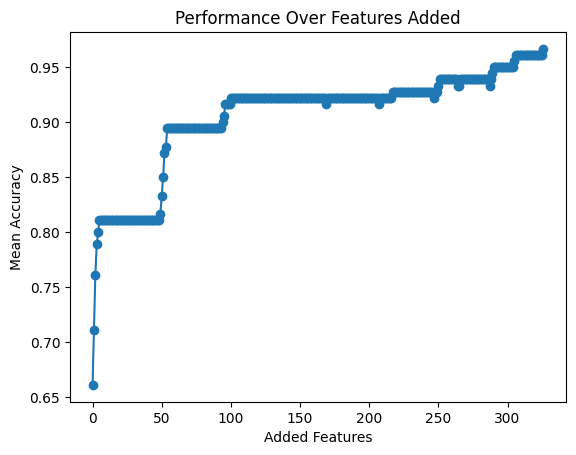

In [4]:
import re
import matplotlib.pyplot as plt

# Provided text
text = """
Added feature: ratio_beta_37, Updated Performance: 0.6611111111111112
Added feature: ratio_beta_34, Updated Performance: 0.711111111111111
Added feature: ratio_beta_44, Updated Performance: 0.7611111111111111
Added feature: alpha_eo_9, Updated Performance: 0.7888888888888889
Added feature: alpha_ec_11, Updated Performance: 0.8
Added feature: beta_ec_6, Updated Performance: 0.8111111111111112
Added feature: beta_ec_0, Updated Performance: 0.8111111111111112
Added feature: alpha_ec_10, Updated Performance: 0.8111111111111112
Added feature: alpha_ec_14, Updated Performance: 0.8111111111111112
Added feature: alpha_ec_12, Updated Performance: 0.8111111111111112
Added feature: alpha_ec_13, Updated Performance: 0.8111111111111112
Added feature: alpha_ec_32, Updated Performance: 0.8111111111111112
Added feature: alpha_ec_43, Updated Performance: 0.8111111111111112
Added feature: beta_ec_1, Updated Performance: 0.8111111111111112
Added feature: beta_ec_2, Updated Performance: 0.8111111111111112
Added feature: alpha_ec_27, Updated Performance: 0.8111111111111112
Added feature: beta_ec_3, Updated Performance: 0.8111111111111112
Added feature: beta_ec_8, Updated Performance: 0.8111111111111112
Added feature: beta_ec_15, Updated Performance: 0.8111111111111112
Added feature: beta_ec_17, Updated Performance: 0.8111111111111112
Added feature: beta_ec_21, Updated Performance: 0.8111111111111112
Added feature: beta_ec_29, Updated Performance: 0.8111111111111112
Added feature: beta_ec_33, Updated Performance: 0.8111111111111112
Added feature: beta_ec_34, Updated Performance: 0.8111111111111112
Added feature: beta_ec_24, Updated Performance: 0.8111111111111112
Added feature: beta_ec_35, Updated Performance: 0.8111111111111112
Added feature: beta_ec_36, Updated Performance: 0.8111111111111112
Added feature: beta_ec_41, Updated Performance: 0.8111111111111112
Added feature: beta_ec_44, Updated Performance: 0.8111111111111112
Added feature: beta_ec_42, Updated Performance: 0.8111111111111112
Added feature: beta_ec_47, Updated Performance: 0.8111111111111112
Added feature: theta_ec_6, Updated Performance: 0.8111111111111112
Added feature: beta_ec_37, Updated Performance: 0.8111111111111112
Added feature: beta_ec_43, Updated Performance: 0.8111111111111112
Added feature: beta_ec_23, Updated Performance: 0.8111111111111112
Added feature: theta_ec_13, Updated Performance: 0.8111111111111112
Added feature: alpha_eo_2, Updated Performance: 0.8111111111111112
Added feature: theta_ec_7, Updated Performance: 0.8111111111111112
Added feature: theta_ec_10, Updated Performance: 0.8111111111111112
Added feature: beta_ec_26, Updated Performance: 0.8111111111111112
Added feature: beta_ec_10, Updated Performance: 0.8111111111111112
Added feature: beta_ec_16, Updated Performance: 0.8111111111111112
Added feature: alpha_ec_22, Updated Performance: 0.8111111111111112
Added feature: beta_ec_13, Updated Performance: 0.8111111111111112
Added feature: beta_ec_4, Updated Performance: 0.8111111111111112
Added feature: beta_ec_12, Updated Performance: 0.8111111111111112
Added feature: alpha_ec_20, Updated Performance: 0.8111111111111112
Added feature: beta_ec_9, Updated Performance: 0.8111111111111112
Added feature: alpha_ec_24, Updated Performance: 0.8111111111111112
Added feature: ratio_beta_21, Updated Performance: 0.8166666666666668
Added feature: ratio_alpha_6, Updated Performance: 0.8333333333333335
Added feature: alpha_eo_31, Updated Performance: 0.8500000000000001
Added feature: beta_eo_26, Updated Performance: 0.8722222222222222
Added feature: ratio_alpha_35, Updated Performance: 0.8777777777777778
Added feature: theta_ec_32, Updated Performance: 0.8944444444444445
Added feature: alpha_ec_0, Updated Performance: 0.8944444444444445
Added feature: alpha_ec_18, Updated Performance: 0.8944444444444445
Added feature: alpha_ec_8, Updated Performance: 0.8944444444444445
Added feature: alpha_ec_37, Updated Performance: 0.8944444444444445
Added feature: alpha_ec_9, Updated Performance: 0.8944444444444445
Added feature: alpha_ec_15, Updated Performance: 0.8944444444444445
Added feature: alpha_ec_19, Updated Performance: 0.8944444444444445
Added feature: alpha_ec_36, Updated Performance: 0.8944444444444445
Added feature: alpha_ec_47, Updated Performance: 0.8944444444444445
Added feature: alpha_ec_40, Updated Performance: 0.8944444444444445
Added feature: beta_ec_20, Updated Performance: 0.8944444444444445
Added feature: beta_ec_14, Updated Performance: 0.8944444444444445
Added feature: beta_ec_27, Updated Performance: 0.8944444444444445
Added feature: beta_ec_32, Updated Performance: 0.8944444444444445
Added feature: beta_ec_39, Updated Performance: 0.8944444444444445
Added feature: beta_ec_28, Updated Performance: 0.8944444444444445
Added feature: beta_ec_38, Updated Performance: 0.8944444444444445
Added feature: beta_ec_45, Updated Performance: 0.8944444444444445
Added feature: beta_ec_46, Updated Performance: 0.8944444444444445
Added feature: alpha_eo_1, Updated Performance: 0.8944444444444445
Added feature: beta_ec_7, Updated Performance: 0.8944444444444445
Added feature: theta_ec_36, Updated Performance: 0.8944444444444445
Added feature: beta_eo_20, Updated Performance: 0.8944444444444445
Added feature: alpha_eo_15, Updated Performance: 0.8944444444444445
Added feature: alpha_ec_38, Updated Performance: 0.8944444444444445
Added feature: beta_ec_25, Updated Performance: 0.8944444444444445
Added feature: beta_ec_40, Updated Performance: 0.8944444444444445
Added feature: beta_ec_5, Updated Performance: 0.8944444444444445
Added feature: beta_ec_11, Updated Performance: 0.8944444444444445
Added feature: alpha_ec_1, Updated Performance: 0.8944444444444445
Added feature: beta_ec_19, Updated Performance: 0.8944444444444445
Added feature: theta_ec_8, Updated Performance: 0.8944444444444445
Added feature: theta_ec_17, Updated Performance: 0.8944444444444445
Added feature: alpha_ec_39, Updated Performance: 0.8944444444444445
Added feature: beta_ec_30, Updated Performance: 0.8944444444444445
Added feature: alpha_ec_35, Updated Performance: 0.8944444444444445
Added feature: theta_ec_4, Updated Performance: 0.8944444444444445
Added feature: theta_ec_1, Updated Performance: 0.8944444444444445
Added feature: theta_ec_3, Updated Performance: 0.8944444444444445
Added feature: theta_eo_8, Updated Performance: 0.9000000000000001
Added feature: ratio_beta_47, Updated Performance: 0.9055555555555554
Added feature: alpha_ec_33, Updated Performance: 0.9166666666666666
Added feature: alpha_ec_3, Updated Performance: 0.9166666666666666
Added feature: theta_ec_5, Updated Performance: 0.9166666666666666
Added feature: alpha_ec_2, Updated Performance: 0.9166666666666666
Added feature: alpha_ec_44, Updated Performance: 0.9222222222222223
Added feature: alpha_ec_21, Updated Performance: 0.9222222222222223
Added feature: alpha_ec_26, Updated Performance: 0.9222222222222223
Added feature: alpha_ec_46, Updated Performance: 0.9222222222222223
Added feature: beta_ec_31, Updated Performance: 0.9222222222222223
Added feature: theta_ec_11, Updated Performance: 0.9222222222222223
Added feature: theta_ec_12, Updated Performance: 0.9222222222222223
Added feature: theta_ec_14, Updated Performance: 0.9222222222222223
Added feature: theta_ec_16, Updated Performance: 0.9222222222222223
Added feature: alpha_ec_41, Updated Performance: 0.9222222222222223
Added feature: theta_ec_18, Updated Performance: 0.9222222222222223
Added feature: alpha_ec_28, Updated Performance: 0.9222222222222223
Added feature: alpha_ec_4, Updated Performance: 0.9222222222222223
Added feature: alpha_ec_34, Updated Performance: 0.9222222222222223
Added feature: alpha_ec_25, Updated Performance: 0.9222222222222223
Added feature: theta_ec_2, Updated Performance: 0.9222222222222223
Added feature: beta_eo_9, Updated Performance: 0.9222222222222223
Added feature: theta_ec_15, Updated Performance: 0.9222222222222223
Added feature: alpha_eo_8, Updated Performance: 0.9222222222222223
Added feature: theta_ec_19, Updated Performance: 0.9222222222222223
Added feature: theta_ec_22, Updated Performance: 0.9222222222222223
Added feature: theta_ec_28, Updated Performance: 0.9222222222222223
Added feature: theta_ec_35, Updated Performance: 0.9222222222222223
Added feature: theta_ec_27, Updated Performance: 0.9222222222222223
Added feature: alpha_eo_0, Updated Performance: 0.9222222222222223
Added feature: theta_ec_41, Updated Performance: 0.9222222222222223
Added feature: theta_ec_9, Updated Performance: 0.9222222222222223
Added feature: theta_ec_20, Updated Performance: 0.9222222222222223
Added feature: alpha_eo_4, Updated Performance: 0.9222222222222223
Added feature: theta_ec_37, Updated Performance: 0.9222222222222223
Added feature: theta_ec_29, Updated Performance: 0.9222222222222223
Added feature: theta_ec_44, Updated Performance: 0.9222222222222223
Added feature: alpha_eo_17, Updated Performance: 0.9222222222222223
Added feature: theta_ec_30, Updated Performance: 0.9222222222222223
Added feature: theta_ec_42, Updated Performance: 0.9222222222222223
Added feature: alpha_eo_13, Updated Performance: 0.9222222222222223
Added feature: beta_eo_5, Updated Performance: 0.9222222222222223
Added feature: beta_eo_4, Updated Performance: 0.9222222222222223
Added feature: theta_ec_47, Updated Performance: 0.9222222222222223
Added feature: beta_eo_8, Updated Performance: 0.9222222222222223
Added feature: theta_ec_45, Updated Performance: 0.9222222222222223
Added feature: beta_eo_10, Updated Performance: 0.9222222222222223
Added feature: beta_eo_7, Updated Performance: 0.9222222222222223
Added feature: theta_ec_38, Updated Performance: 0.9222222222222223
Added feature: theta_ec_31, Updated Performance: 0.9222222222222223
Added feature: alpha_eo_44, Updated Performance: 0.9222222222222223
Added feature: theta_ec_40, Updated Performance: 0.9222222222222223
Added feature: beta_eo_6, Updated Performance: 0.9222222222222223
Added feature: beta_eo_2, Updated Performance: 0.9222222222222223
Added feature: beta_eo_17, Updated Performance: 0.9222222222222223
Added feature: beta_eo_25, Updated Performance: 0.9222222222222223
Added feature: beta_eo_33, Updated Performance: 0.9222222222222223
Added feature: beta_eo_27, Updated Performance: 0.9222222222222223
Added feature: beta_eo_13, Updated Performance: 0.9222222222222223
Added feature: theta_ec_21, Updated Performance: 0.9222222222222223
Added feature: alpha_eo_45, Updated Performance: 0.9222222222222223
Added feature: beta_eo_28, Updated Performance: 0.9222222222222223
Added feature: theta_eo_16, Updated Performance: 0.9222222222222223
Added feature: theta_ec_0, Updated Performance: 0.9222222222222223
Added feature: theta_ec_25, Updated Performance: 0.9222222222222223
Added feature: alpha_eo_12, Updated Performance: 0.9222222222222223
Added feature: theta_ec_43, Updated Performance: 0.9222222222222223
Added feature: beta_eo_30, Updated Performance: 0.9222222222222223
Added feature: beta_eo_42, Updated Performance: 0.9222222222222223
Added feature: theta_ec_23, Updated Performance: 0.9222222222222223
Added feature: ratio_beta_12, Updated Performance: 0.9222222222222223
Added feature: theta_ec_46, Updated Performance: 0.9222222222222223
Added feature: theta_ec_24, Updated Performance: 0.9222222222222223
Added feature: beta_eo_18, Updated Performance: 0.9222222222222223
Added feature: alpha_eo_25, Updated Performance: 0.9166666666666666
Added feature: beta_eo_16, Updated Performance: 0.9222222222222223
Added feature: theta_ec_39, Updated Performance: 0.9222222222222223
Added feature: alpha_eo_7, Updated Performance: 0.9222222222222223
Added feature: alpha_eo_41, Updated Performance: 0.9222222222222223
Added feature: theta_ec_26, Updated Performance: 0.9222222222222223
Added feature: alpha_eo_16, Updated Performance: 0.9222222222222223
Added feature: alpha_ec_45, Updated Performance: 0.9222222222222223
Added feature: alpha_eo_18, Updated Performance: 0.9222222222222223
Added feature: alpha_eo_36, Updated Performance: 0.9222222222222223
Added feature: alpha_eo_6, Updated Performance: 0.9222222222222223
Added feature: alpha_eo_27, Updated Performance: 0.9222222222222223
Added feature: alpha_eo_46, Updated Performance: 0.9222222222222223
Added feature: beta_eo_12, Updated Performance: 0.9222222222222223
Added feature: alpha_eo_42, Updated Performance: 0.9222222222222223
Added feature: beta_ec_22, Updated Performance: 0.9222222222222223
Added feature: alpha_eo_10, Updated Performance: 0.9222222222222223
Added feature: alpha_eo_37, Updated Performance: 0.9222222222222223
Added feature: alpha_eo_47, Updated Performance: 0.9222222222222223
Added feature: alpha_eo_33, Updated Performance: 0.9222222222222223
Added feature: beta_eo_0, Updated Performance: 0.9222222222222223
Added feature: beta_eo_14, Updated Performance: 0.9222222222222223
Added feature: beta_eo_22, Updated Performance: 0.9222222222222223
Added feature: beta_eo_21, Updated Performance: 0.9222222222222223
Added feature: beta_eo_29, Updated Performance: 0.9222222222222223
Added feature: beta_eo_37, Updated Performance: 0.9222222222222223
Added feature: alpha_eo_43, Updated Performance: 0.9222222222222223
Added feature: alpha_eo_38, Updated Performance: 0.9222222222222223
Added feature: alpha_eo_39, Updated Performance: 0.9222222222222223
Added feature: beta_eo_38, Updated Performance: 0.9222222222222223
Added feature: beta_eo_43, Updated Performance: 0.9222222222222223
Added feature: beta_eo_47, Updated Performance: 0.9222222222222223
Added feature: beta_eo_41, Updated Performance: 0.9222222222222223
Added feature: theta_eo_6, Updated Performance: 0.9222222222222223
Added feature: theta_ec_33, Updated Performance: 0.9222222222222223
Added feature: beta_eo_3, Updated Performance: 0.9222222222222223
Added feature: beta_eo_35, Updated Performance: 0.9222222222222223
Added feature: beta_eo_36, Updated Performance: 0.9222222222222223
Added feature: alpha_eo_5, Updated Performance: 0.9166666666666666
Added feature: ratio_beta_20, Updated Performance: 0.9222222222222223
Added feature: beta_eo_44, Updated Performance: 0.9222222222222223
Added feature: alpha_eo_28, Updated Performance: 0.9222222222222223
Added feature: alpha_eo_11, Updated Performance: 0.9222222222222223
Added feature: alpha_eo_23, Updated Performance: 0.9222222222222223
Added feature: beta_eo_15, Updated Performance: 0.9222222222222223
Added feature: beta_eo_45, Updated Performance: 0.9222222222222223
Added feature: theta_ec_34, Updated Performance: 0.9222222222222223
Added feature: beta_eo_23, Updated Performance: 0.9222222222222223
Added feature: beta_eo_31, Updated Performance: 0.9277777777777779
Added feature: alpha_ec_42, Updated Performance: 0.9277777777777779
Added feature: alpha_ec_5, Updated Performance: 0.9277777777777779
Added feature: alpha_eo_20, Updated Performance: 0.9277777777777779
Added feature: beta_eo_11, Updated Performance: 0.9277777777777779
Added feature: beta_eo_34, Updated Performance: 0.9277777777777779
Added feature: alpha_eo_19, Updated Performance: 0.9277777777777779
Added feature: beta_ec_18, Updated Performance: 0.9277777777777779
Added feature: alpha_ec_23, Updated Performance: 0.9277777777777779
Added feature: alpha_ec_6, Updated Performance: 0.9277777777777779
Added feature: theta_eo_4, Updated Performance: 0.9277777777777779
Added feature: alpha_ec_29, Updated Performance: 0.9277777777777779
Added feature: theta_eo_11, Updated Performance: 0.9277777777777779
Added feature: beta_eo_1, Updated Performance: 0.9277777777777779
Added feature: theta_eo_10, Updated Performance: 0.9277777777777779
Added feature: alpha_eo_24, Updated Performance: 0.9277777777777779
Added feature: alpha_ec_30, Updated Performance: 0.9277777777777779
Added feature: theta_eo_3, Updated Performance: 0.9277777777777779
Added feature: alpha_ec_7, Updated Performance: 0.9277777777777779
Added feature: alpha_eo_30, Updated Performance: 0.9277777777777779
Added feature: theta_eo_17, Updated Performance: 0.9277777777777779
Added feature: alpha_eo_32, Updated Performance: 0.9277777777777779
Added feature: theta_eo_18, Updated Performance: 0.9277777777777779
Added feature: theta_eo_15, Updated Performance: 0.9277777777777779
Added feature: ratio_beta_1, Updated Performance: 0.9277777777777779
Added feature: theta_eo_46, Updated Performance: 0.9277777777777779
Added feature: theta_eo_47, Updated Performance: 0.9277777777777779
Added feature: beta_eo_32, Updated Performance: 0.9277777777777779
Added feature: ratio_alpha_2, Updated Performance: 0.9277777777777779
Added feature: theta_eo_5, Updated Performance: 0.9277777777777779
Added feature: alpha_ec_31, Updated Performance: 0.9222222222222223
Added feature: ratio_theta_42, Updated Performance: 0.9277777777777779
Added feature: alpha_eo_3, Updated Performance: 0.9277777777777779
Added feature: ratio_alpha_23, Updated Performance: 0.9333333333333333
Added feature: ratio_alpha_18, Updated Performance: 0.9388888888888888
Added feature: alpha_eo_26, Updated Performance: 0.9388888888888888
Added feature: beta_eo_19, Updated Performance: 0.9388888888888888
Added feature: theta_eo_22, Updated Performance: 0.9388888888888888
Added feature: theta_eo_42, Updated Performance: 0.9388888888888888
Added feature: ratio_theta_15, Updated Performance: 0.9388888888888888
Added feature: alpha_eo_35, Updated Performance: 0.9388888888888888
Added feature: theta_eo_23, Updated Performance: 0.9388888888888888
Added feature: theta_eo_24, Updated Performance: 0.9388888888888888
Added feature: theta_eo_25, Updated Performance: 0.9388888888888888
Added feature: alpha_ec_17, Updated Performance: 0.9388888888888888
Added feature: theta_eo_7, Updated Performance: 0.9388888888888888
Added feature: theta_eo_44, Updated Performance: 0.9388888888888888
Added feature: ratio_beta_6, Updated Performance: 0.9333333333333333
Added feature: theta_eo_31, Updated Performance: 0.9333333333333333
Added feature: ratio_alpha_20, Updated Performance: 0.9388888888888888
Added feature: beta_eo_46, Updated Performance: 0.9388888888888888
Added feature: theta_eo_2, Updated Performance: 0.9388888888888888
Added feature: theta_eo_20, Updated Performance: 0.9388888888888888
Added feature: theta_eo_0, Updated Performance: 0.9388888888888888
Added feature: alpha_eo_29, Updated Performance: 0.9388888888888888
Added feature: theta_eo_9, Updated Performance: 0.9388888888888888
Added feature: theta_eo_38, Updated Performance: 0.9388888888888888
Added feature: theta_eo_21, Updated Performance: 0.9388888888888888
Added feature: theta_eo_30, Updated Performance: 0.9388888888888888
Added feature: ratio_beta_7, Updated Performance: 0.9388888888888888
Added feature: beta_eo_39, Updated Performance: 0.9388888888888888
Added feature: ratio_beta_3, Updated Performance: 0.9388888888888888
Added feature: ratio_beta_11, Updated Performance: 0.9388888888888888
Added feature: ratio_alpha_11, Updated Performance: 0.9388888888888888
Added feature: beta_eo_24, Updated Performance: 0.9388888888888888
Added feature: theta_eo_26, Updated Performance: 0.9388888888888888
Added feature: theta_eo_33, Updated Performance: 0.9388888888888888
Added feature: alpha_eo_21, Updated Performance: 0.9388888888888888
Added feature: theta_eo_37, Updated Performance: 0.9388888888888888
Added feature: theta_eo_39, Updated Performance: 0.9388888888888888
Added feature: ratio_beta_45, Updated Performance: 0.9333333333333333
Added feature: ratio_alpha_31, Updated Performance: 0.9388888888888888
Added feature: ratio_beta_18, Updated Performance: 0.9444444444444444
Added feature: ratio_alpha_8, Updated Performance: 0.9499999999999998
Added feature: alpha_eo_14, Updated Performance: 0.9499999999999998
Added feature: alpha_eo_34, Updated Performance: 0.9499999999999998
Added feature: theta_eo_1, Updated Performance: 0.9499999999999998
Added feature: theta_eo_12, Updated Performance: 0.9499999999999998
Added feature: theta_eo_43, Updated Performance: 0.9499999999999998
Added feature: ratio_alpha_4, Updated Performance: 0.9499999999999998
Added feature: beta_eo_40, Updated Performance: 0.9499999999999998
Added feature: theta_eo_13, Updated Performance: 0.9499999999999998
Added feature: theta_eo_14, Updated Performance: 0.9499999999999998
Added feature: theta_eo_35, Updated Performance: 0.9499999999999998
Added feature: theta_eo_40, Updated Performance: 0.9499999999999998
Added feature: ratio_alpha_0, Updated Performance: 0.9500000000000001
Added feature: theta_eo_32, Updated Performance: 0.9500000000000001
Added feature: theta_eo_19, Updated Performance: 0.9500000000000001
Added feature: ratio_beta_15, Updated Performance: 0.9555555555555555
Added feature: ratio_beta_17, Updated Performance: 0.9611111111111111
Added feature: alpha_eo_22, Updated Performance: 0.9611111111111111
Added feature: theta_eo_27, Updated Performance: 0.9611111111111111
Added feature: alpha_ec_16, Updated Performance: 0.9611111111111111
Added feature: theta_eo_34, Updated Performance: 0.9611111111111111
Added feature: theta_eo_36, Updated Performance: 0.9611111111111111
Added feature: theta_eo_41, Updated Performance: 0.9611111111111111
Added feature: theta_eo_45, Updated Performance: 0.9611111111111111
Added feature: ratio_alpha_14, Updated Performance: 0.9611111111111111
Added feature: alpha_eo_40, Updated Performance: 0.9611111111111111
Added feature: theta_eo_28, Updated Performance: 0.9611111111111111
Added feature: ratio_alpha_16, Updated Performance: 0.9611111111111111
Added feature: ratio_beta_13, Updated Performance: 0.9611111111111111
Added feature: ratio_beta_26, Updated Performance: 0.9611111111111111
Added feature: ratio_beta_29, Updated Performance: 0.9611111111111111
Added feature: ratio_alpha_29, Updated Performance: 0.9611111111111111
Added feature: theta_eo_29, Updated Performance: 0.9611111111111111
Added feature: ratio_beta_16, Updated Performance: 0.9611111111111111
Added feature: ratio_theta_34, Updated Performance: 0.9611111111111111
Added feature: ratio_alpha_13, Updated Performance: 0.9611111111111111
Added feature: ratio_beta_36, Updated Performance: 0.9666666666666666
"""

# Extracting names and feature names
names = re.findall(r'Added feature: (\w+_\w+),', text)
feature_names = re.findall(r'Added feature: (\w+_\w+),.*?Updated Performance: (\d+\.\d+)', text)

# Extracting accuracy values
accuracy_values = [float(value) for _, value in feature_names]

# Plotting the performance values
plt.plot(accuracy_values, marker='o')
plt.xlabel('Added Features')
plt.ylabel('Mean Accuracy')
plt.title('Performance Over Features Added')
plt.show()